**Criando Carteira de Ações**

Importar bibliotecas Python:

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf

Criar lista contendo as siglas das ações a analisar:

In [27]:
acoes = ['ABEV3.SA', 'ODPV3.SA', 'VIVT3.SA', 'PETR4.SA', 'BBAS3.SA', 'BOVA11.SA']

Gerar o "data frame" através da variável -> 'acoes_df', e utilizar o yfinance para fazer downloads das ações no periodo desejado:

In [28]:
acoes_df = pd.DataFrame()
for acao in acoes:
    acoes_df[acao] = yf.download(acao, start='2015-01-01', end='2020-11-04')['Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Visualização da tabela:

In [29]:
acoes_df

,ABEV3.SA,ODPV3.SA,VIVT3.SA,PETR4.SA,BBAS3.SA,BOVA11.SA
Date,,,,,,
2015-01-02,16.020000,9.37,37.820000,9.360000,22.650000,47.259998
2015-01-05,15.730000,9.62,37.070000,8.560000,22.180000,46.320000
2015-01-06,16.330000,9.55,36.150002,8.280000,22.490000,46.580002
2015-01-07,16.559999,9.69,37.389999,8.670000,23.480000,48.150002
2015-01-08,16.540001,9.66,38.910000,9.230000,23.559999,48.509998
...,...,...,...,...,...,...
2020-10-27,13.720000,14.00,43.480000,19.879999,32.779999,95.680000
2020-10-28,13.370000,12.97,42.610001,18.670000,31.139999,91.559998
2020-10-29,12.890000,12.84,42.250000,19.290001,30.959999,92.800003


Verificar se há valores nulos:

In [30]:
acoes_df.isnull().sum()

ABEV3.SA      0
ODPV3.SA      0
VIVT3.SA      0
PETR4.SA      0
BBAS3.SA      0
BOVA11.SA    27
dtype: int64

Eliminando e verificando se os valores nulos fora eliminados:

In [31]:
acoes_df.dropna(inplace=True)
acoes_df.isnull().sum()

ABEV3.SA     0
ODPV3.SA     0
VIVT3.SA     0
PETR4.SA     0
BBAS3.SA     0
BOVA11.SA    0
dtype: int64

Alterando os nomes das colunas do Data Frame:

In [32]:
acoes_df = acoes_df.rename(columns={'ABEV3.SA': 'AMBV', 'ODPV3.SA': 'ODONT', 'VIVT3.SA': 'VIVO', 
                    'PETR4.SA': 'PETRO', 'BBAS3.SA': 'BBRAS', 'BOVA11.SA': 'BOVA'}) 

Criando arquivo '.csv':

In [33]:
acoes_df.to_csv('acoes.csv')


Lendo arquivo '.csv':

In [34]:
acoes_df = pd.read_csv('acoes.csv')
acoes_df

,Date,AMBV,ODONT,VIVO,PETRO,BBRAS,BOVA
0,2015-01-02,16.020000,9.37,37.820000,9.360000,22.650000,47.259998
1,2015-01-05,15.730000,9.62,37.070000,8.560000,22.180000,46.320000
2,2015-01-06,16.330000,9.55,36.150002,8.280000,22.490000,46.580002
3,2015-01-07,16.559999,9.69,37.389999,8.670000,23.480000,48.150002
4,2015-01-08,16.540001,9.66,38.910000,9.230000,23.559999,48.509998
...,...,...,...,...,...,...,...
1421,2020-10-27,13.720000,14.00,43.480000,19.879999,32.779999,95.680000
1422,2020-10-28,13.370000,12.97,42.610001,18.670000,31.139999,91.559998
1423,2020-10-29,12.890000,12.84,42.250000,19.290001,30.959999,92.800003
1424,2020-10-30,12.180000,12.61,42.669998,18.940001,29.799999,90.660004


Descrevendo as ações:


-> As ações da Ibovespa 'BOVA' foram as que apresentaram o maior indice de desvio padrão(std).

In [ ]:
acoes_df.describe()

Normalizando as taxas:

In [38]:
acoes_normalizadas = acoes_df.copy()
for i in acoes_normalizadas.columns[1:]:
    acoes_normalizadas[i] = acoes_normalizadas[i] / acoes_normalizadas[i][0]

acoes_normalizadas 

,Date,AMBV,ODONT,VIVO,PETRO,BBRAS,BOVA
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.981898,1.026681,0.980169,0.914530,0.979249,0.980110
2,2015-01-06,1.019351,1.019210,0.955844,0.884615,0.992936,0.985612
3,2015-01-07,1.033708,1.034152,0.988630,0.926282,1.036645,1.018832
4,2015-01-08,1.032459,1.030950,1.028821,0.986111,1.040177,1.026449
...,...,...,...,...,...,...,...
1421,2020-10-27,0.856429,1.494130,1.149656,2.123932,1.447241,2.024545
1422,2020-10-28,0.834582,1.384205,1.126653,1.994658,1.374834,1.937368
1423,2020-10-29,0.804619,1.370331,1.117134,2.060898,1.366887,1.963606
1424,2020-10-30,0.760300,1.345784,1.128239,2.023504,1.315673,1.918324


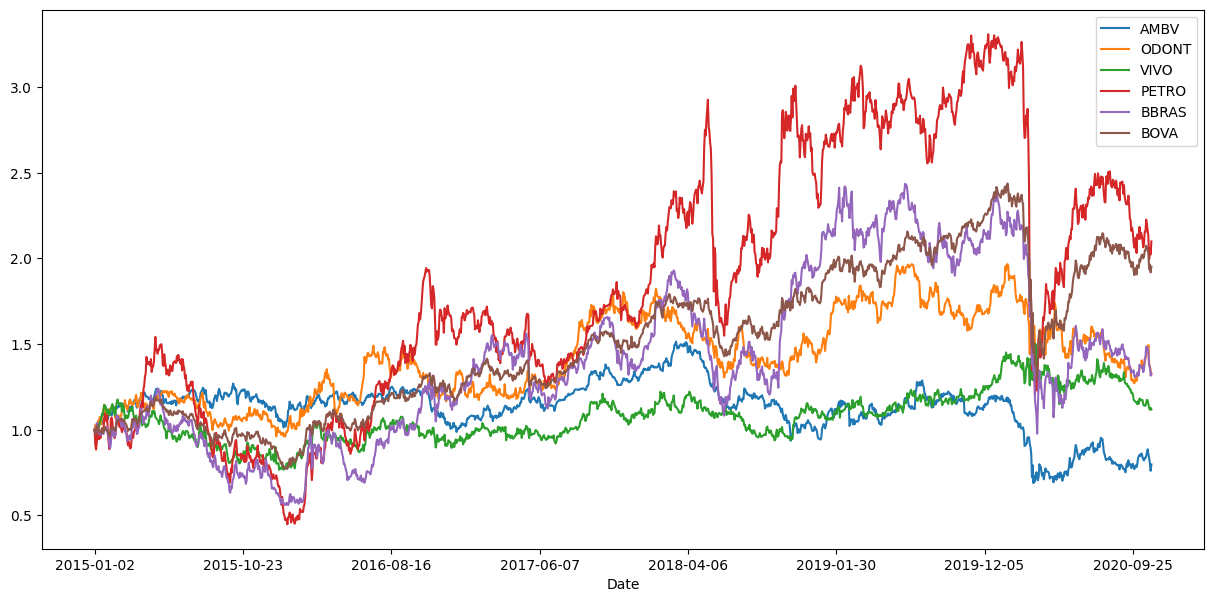

In [41]:
acoes_normalizadas.plot(x='Date', figsize=(15, 7));

Apagando a coluna data:

In [42]:
acoes_normalizadas.drop(labels=['Date'], axis=1, inplace=True)

Efetuando o comparativo de todas as ações no mesmo periodo de tempo.

In [43]:
retorno_carteira = (acoes_normalizadas / acoes_normalizadas.shift(1)) - 1
retorno_carteira.head()  # ".head()" -> para ler os 5 primeiras linhas do data frame

,AMBV,ODONT,VIVO,PETRO,BBRAS,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.018102,0.026681,-0.019831,-0.085470,-0.020751,-0.019890
2,0.038144,-0.007276,-0.024818,-0.032710,0.013977,0.005613
3,0.014084,0.014660,0.034301,0.047101,0.044020,0.033705
4,-0.001208,-0.003096,0.040653,0.064590,0.003407,0.007477


Calculando o retorno anual da carteira de cada ação

In [44]:
retorno_anual = retorno_carteira.mean() * 246
retorno_anual

AMBV    -0.001321
ODONT    0.098078
VIVO     0.070810
PETRO    0.272298
BBRAS    0.162370
BOVA     0.153039
dtype: float64